In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Neural network class definition

class FuncApprox:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, sigma):
        
        # set the structure of the NN
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        self.sigma = sigma
        
        
        # activation function : gaussian   
        self.activation = lambda x,u: self.gaussian(x,u)
        
        
        # Weight subscript notation : current layer ---> next layer
        self.wih =  np.random.rand(self.inodes, self.hnodes) 
        self.who =  np.random.rand(self.hnodes*self.inodes, self.onodes)
        
        pass
    
    
    
    def gaussian(self, x, u):
        return 1/(np.sqrt(2*np.pi) * self.sigma) * np.exp(-0.5 * (( x - u / self.sigma)**2))
        pass
    
    
    
    def Cluster(self, x):
        
        # Order of x : self.inodes X 1 (pass one input at a time)
        x = np.array(x).reshape(self.inodes,1)
        
        #Find the winning neuron
        y = (x - self.wih)**2
        y = y.sum(0)
        winningNeuron = np.argmin(y)
        leftNeuron = (winningNeuron - 1) % self.hnodes
        rightNeuron = (winningNeuron + 1) % self.hnodes
        
            
        Neighbourhood = np.zeros(self.hnodes)   
        Neighbourhood[winningNeuron] = 1
        Neighbourhood[leftNeuron] = 0.5
        Neighbourhood[rightNeuron] = 0.5
        
        Neighbourhood = np.array([Neighbourhood])
        N = Neighbourhood
        
        for i in range(self.inodes - 1):
            Neighbourhood = np.append(Neighbourhood,N, axis = 0)
        
        
        #Update the winning neuron
        delta_wih = np.zeros_like(self.wih)
        
        delta_wih = self.lr * Neighbourhood * (x - self.wih)
        
        
        self.wih = np.add(self.wih,delta_wih)
               
        pass
    
    
    
    
    def RBFN(self, x):
        
        u = self.wih
        hidden_output = self.activation(x,u)                                     #Order : self.hnodes X self.inodes
        self.hidden_output = hidden_output.reshape(self.hnodes * self.inodes , 1) 
        self.output = np.matmul(self.who.T , self.hidden_output)                      #Order : self.onodes X 1
        
        return self.output
    
        pass

    
    def backpropagate(self,target):
        
        # Compute delta_who
        self.delta_who = self.lr * (target - self.output) * self.hidden_output

        #Update Weights
        self.who = np.add(self.who,self.delta_who)

        pass
    
    
    
    def querry(self,inputs):
        
        self.Cluster(inputs)                
        output = self.RBFN(inputs)
        
        return output
        
        pass

    
    
    def train(self,inputs,target,MaxEpochs = 25):
        
        self.y = []
        
        for epoch in range(MaxEpochs):     
        
            # Feeding forward one input (consisting of 'self.inodes' no. of features) at a time
            for n in range(len(inputs)): 
                
                # Get the actual output from the NN : Order (self.onodes X 1)
                output = self.querry(inputs[n])
                
                if ( epoch == MaxEpochs-1):
                    self.y.append( output )
                                
                #Backpropagate the error                
                self.backpropagate(target[n])
                
            #Epoch complete   
    pass      


In [3]:
x = np.arange(0,10,0.01)
x = x.reshape(len(x),1,1)
t = x * np.sin(x)

In [4]:
# xmax = x[np.argmax(x)]
# tmax = t[np.argmax(t)]
# x = x/xmax
# t = t/tmax

In [5]:
A = FuncApprox(1,3,1,0.3,1)

In [6]:
A.train(x,t,20)

In [7]:
y = np.array(A.y)

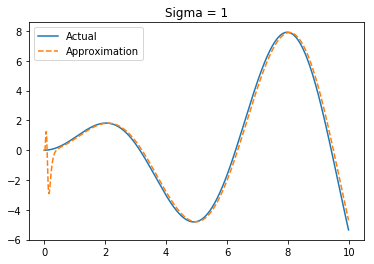

In [8]:
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 2)

plt.title('Sigma = 1')

## Effect of Sigma

### sigma = 0.8

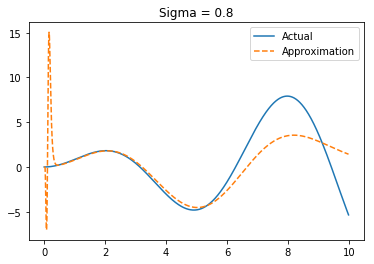

In [9]:
A = FuncApprox(1,3,1,0.3,0.8)

x = np.arange(0,10,0.01)
x = x.reshape(len(x),1,1)
t = x * np.sin(x)


A.train(x,t,20)
y = np.array(A.y)
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 0)

plt.title('Sigma = 0.8')

### sigma = 1.5

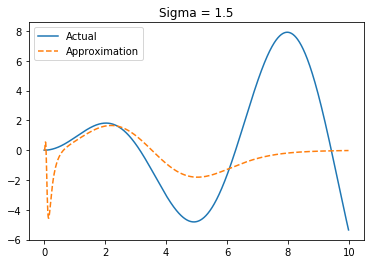

In [10]:
A = FuncApprox(1,3,1,0.3,1.5)

x = np.arange(0,10,0.01)
x = x.reshape(len(x),1,1)
t = x * np.sin(x)


A.train(x,t,20)
y = np.array(A.y)
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 2)

plt.title('Sigma = 1.5')

### Effect of hidden neurons

#### hidden Nodes = 20

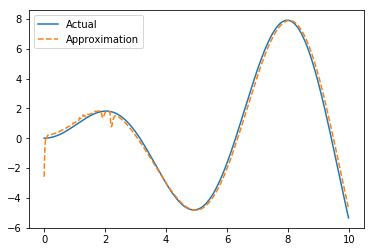

In [11]:
A = FuncApprox(1,20,1,0.3,1)

A.train(x,t,20)
y = np.array(A.y)
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 2)

#### Conclusion : No  of hidden nodes doesn't improve approximation 

### Effect of samples

### 100 samples

In [12]:
x = np.arange(0,10,0.1)
x = x.reshape(len(x),1,1)
t = x * np.sin(x)

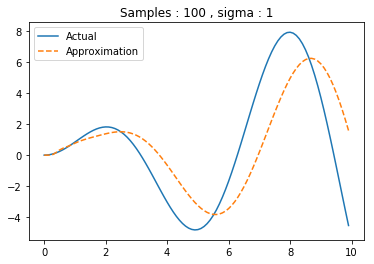

In [13]:
A = FuncApprox(1,3,1,0.3,1)

A.train(x,t,20)
y = np.array(A.y)
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 2)

plt.title("Samples : {} , sigma : {}".format(len(x) , A.sigma))

### 1000 samples

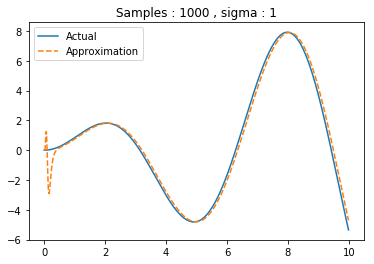

In [14]:
x = np.arange(0,10,0.01)
x = x.reshape(len(x),1,1)
t = x * np.sin(x)

A = FuncApprox(1,3,1,0.3,1)

A.train(x,t,20)
y = np.array(A.y)
plt.plot(x.reshape(len(x),1) , t.reshape(len(t),1) ,label = 'Actual')

plt.plot(x.reshape(len(x),1) , y.reshape(len(y),1) , '--' ,label = 'Approximation')

plt.legend( loc = 2)

plt.title("Samples : {} , sigma : {}".format(len(x) , A.sigma))

#### Conclusion : More samples ==> Better Approximation